## K - means Clustering
### Creating 5 Clusters using randn function

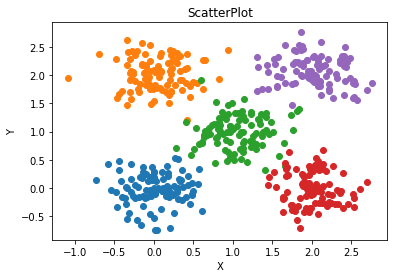

In [3]:
import numpy as np
import matplotlib.pyplot as plt

S_D = 0.3

cluster1 = [0,0] + S_D * np.random.randn(100,2)
cluster2 = [0,2] + S_D * np.random.randn(100,2)
cluster3 = [1,1] + S_D * np.random.randn(100,2)
cluster4 = [2,0] + S_D * np.random.randn(100,2)
cluster5 = [2,2] + S_D * np.random.randn(100,2)

plt.scatter(cluster1[:,0],cluster1[:,1])
plt.scatter(cluster2[:,0],cluster2[:,1])
plt.scatter(cluster3[:,0],cluster3[:,1])
plt.scatter(cluster4[:,0],cluster4[:,1])
plt.scatter(cluster5[:,0],cluster5[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('ScatterPlot')
plt.show()

#### Concatanating the clusters and shuffling the points

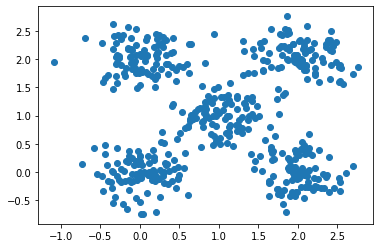

In [4]:
cluster = np.concatenate((cluster1, cluster2, cluster3, cluster4, cluster5),axis = 0)
cluster.reshape((500,2))
np.random.shuffle(cluster)
plt.scatter(cluster[:,0],cluster[:,1])
plt.show()

#### Seperating the points as K clusters

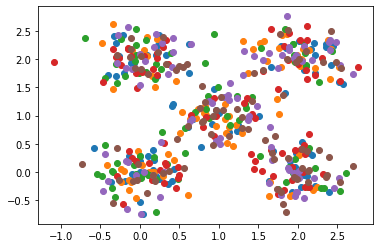

In [11]:
def seperation(cluster,K):
    
    for i in range(len(cluster),0,-1):
        if i% K == 0:
            sep = i
            break
            
    cluster_seperation = np.split(cluster[:sep,:],K)
    
    dict_of_sep = {}
    
    for i in range(len(cluster_seperation)):
        dict_of_sep[i+1] = cluster_seperation[i]
        
    return dict_of_sep
scatter_plot(seperation(cluster,6))

#### Function for finding mean for the K clusters

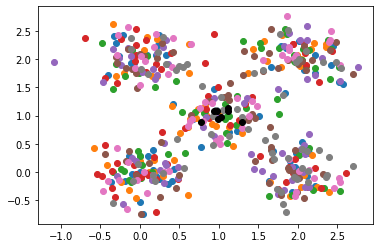

In [12]:
def mean_of_sep(seperated_cluster,no_of_sep):
    mean_list = {}
    
    for i in range(no_of_sep):
        mean_list[i+1]= np.mean(seperated_cluster[i+1],axis = 0)
    return mean_list

scatter_plot(seperation(cluster,8))
mean_scatter_plot(mean_of_sep(seperation(cluster,8),8))

#### Function that finds the closest mean

In [13]:
def closest_mean(point,mean_list):
    dist_list = []
    for i in range(len(mean_list)):
        diff = point - mean_list[i+1]
        distance = np.sqrt(np.dot(diff,diff))
        dist_list.append(distance)
    min_distance = min(dist_list)
    index_of_list = dist_list.index(min_distance) + 1
    return index_of_list

#### Function for seperating the points into K clusters by finding the distance between points and means

In [14]:
def clustering(clusters,mean_list):
    new_dict = {}
    for i in range(len(mean_list)):
        new_dict[i+1] = []
    for i in range(k):
        n = clusters[i+1]
        for j in range(len(n)):
            index1 = closest_mean(np.array(n[j]),mean_list)
            new_dict[index1].append(n[j])
    try:
        for i in range(len(mean_list)):
            new_dict[i+1]= np.concatenate(new_dict[i+1]).reshape(-1,2)
    except:
        pass
    
    return new_dict

#### Functions for Creating scatterPlots

In [15]:
def scatter_plot(dict_of_clusters):
    for i in range(len(dict_of_clusters)):
        plt.scatter(dict_of_clusters[i+1][:,0], dict_of_clusters[i+1][:,1])

In [16]:
def mean_scatter_plot(dict_of_clusters):
    for i in range(len(dict_of_clusters)):
        plt.scatter(dict_of_clusters[i+1][0], dict_of_clusters[i+1][1],color = "black")

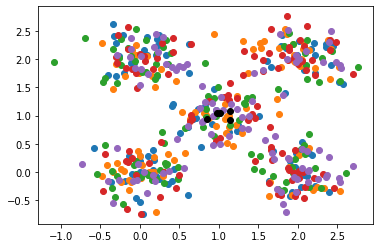

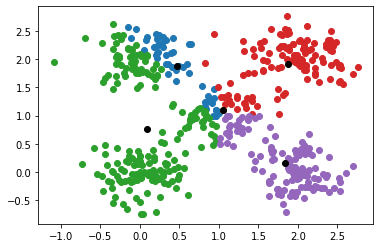

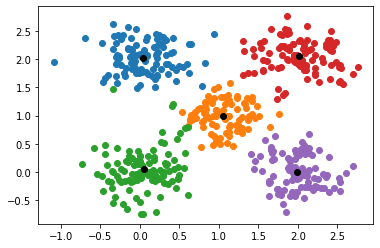

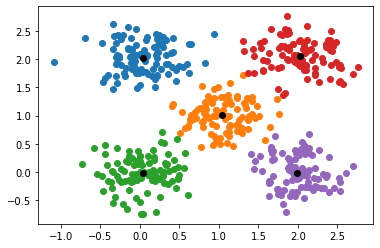

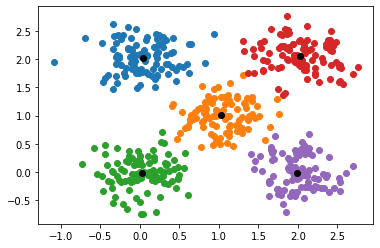

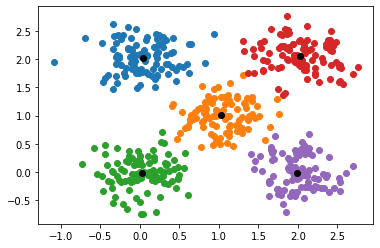

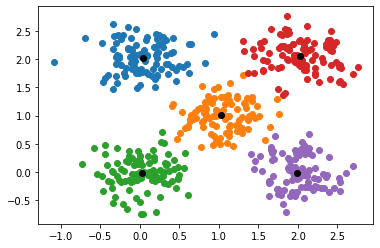

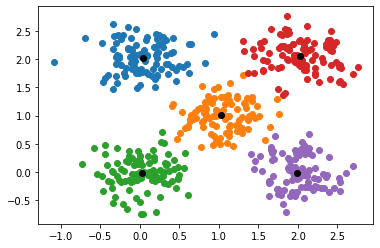

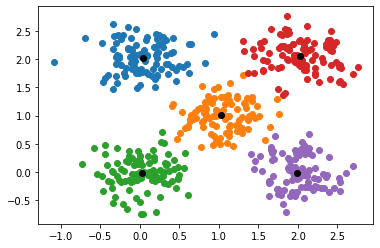

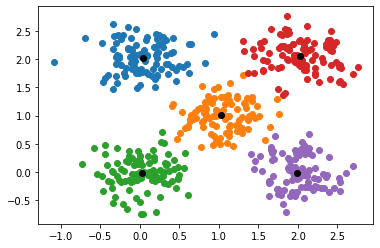

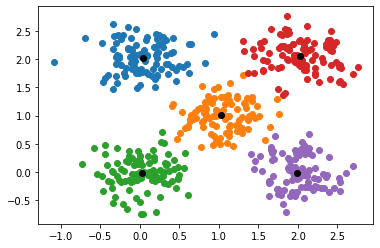

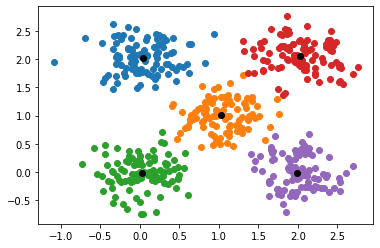

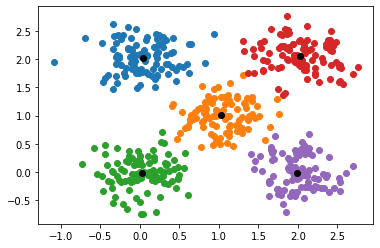

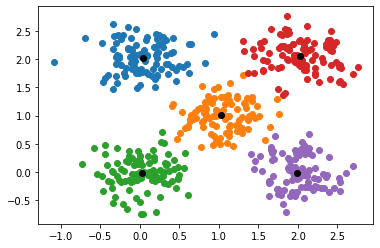

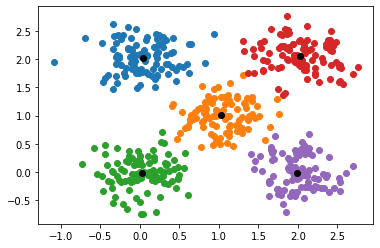

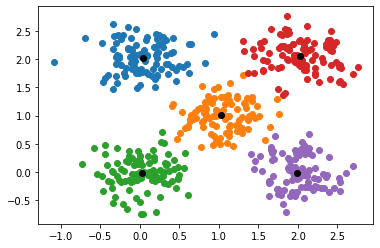

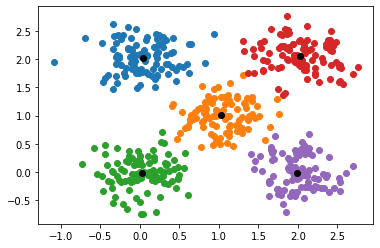

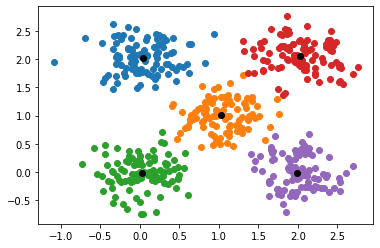

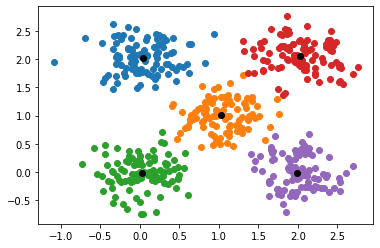

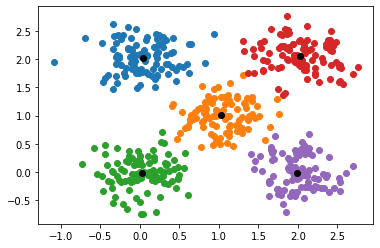

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(0)
k = 5
clust = seperation(cluster,k)
center_of_sep = mean_of_sep(clust,k)
scatter_plot(clust)
mean_scatter_plot(mean_of_sep(clust,k))
plt.show()

for i in range(1,20):
    
    plt.figure(1)
    clust = clustering(clust,mean_of_sep(clust,k))
    scatter_plot(clust)
    mean_scatter_plot(mean_of_sep(clust,k))
    plt.draw()
    plt.pause(0.05)
    plt.clf()